In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.0


## Import the dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [6]:
train_labels

set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

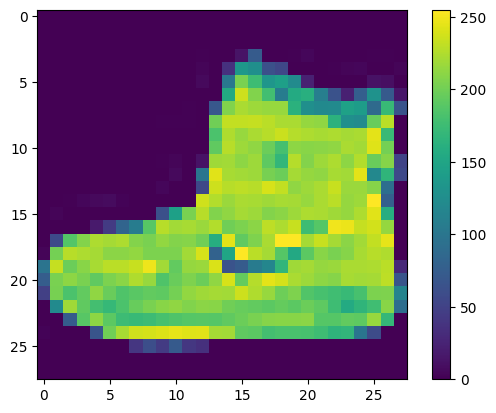

In [7]:
# show a sample image
plt.imshow(train_images[0])
# draw a colorbar to find the values of the pixels
plt.colorbar()

Since the values reach from 0 to 255, we will have to normalize them.

In [8]:
test_images = test_images / 255
train_images = train_images / 255

Again let us check how the images do look now after the normalization

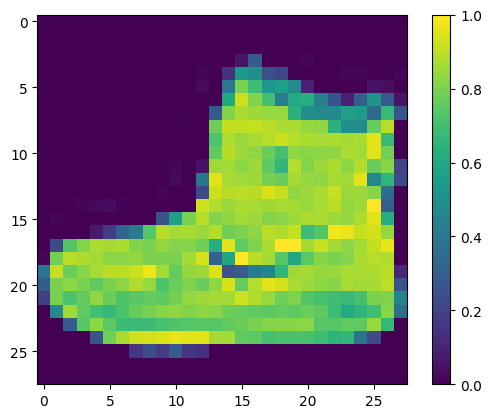

In [9]:
# show a sample image
plt.imshow(train_images[0])
# draw a colorbar to find the values of the pixels
plt.colorbar()

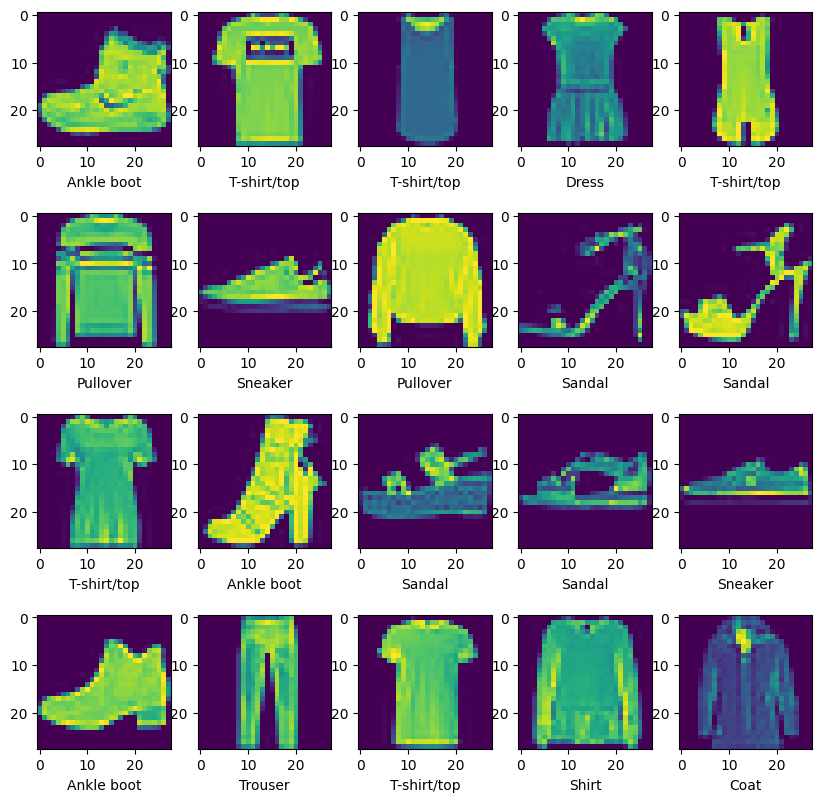

In [15]:
# set fig size
plt.figure(figsize=(10,10))
# iterate through the images
for i in range(20):
    # define subplots with 4 rows and 5 columns
    plt.subplot(4,5,i+1)
    # show the image
    plt.imshow(train_images[i])
    # add the according label to it
    plt.xlabel(class_names[train_labels[i]])

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    # output 1 of 10 classes
    tf.keras.layers.Dense(10)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4978 - accuracy: 0.8271
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3774 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3387 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3145 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2974 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2804 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2673 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2568 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2480 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3346 - accuracy: 0.8813 - 331ms/epoch - 1ms/step

Test accuracy: 0.8812999725341797


## Add softmax to the model to make its results more interpretable.

In [22]:
model_with_softmax = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [25]:
predictions = model_with_softmax.predict(test_images)

313/313 [==============================] - 1s 2ms/step


predictions = [5.2139416e-07 9.1538894e-08 3.5646588e-10 3.2807482e-11 6.3623752e-08
 1.6624536e-03 2.5424103e-07 2.4922149e-02 5.3669567e-07 9.7341383e-01], label = 9
9
Ankle boot


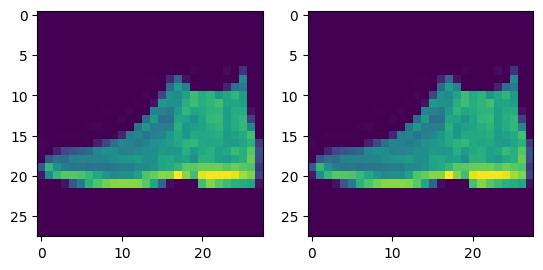

In [41]:
print("predictions = {}, label = {}".format(predictions[0], test_labels[0]))
# get index of the maximum value
print(np.argmax(predictions[0]))
print(class_names[np.argmax(predictions[0])])

plt.subplot(1,2,1)
plt.imshow(test_images[0])
plt.subplot(1,2,)
plt.a

## Use the model:

Text(0.5, 0, 'Pullover')

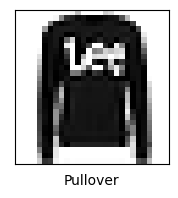

In [49]:
img = test_images[1]

plt.figure(figsize=(2,2))
plt.xticks([])
plt.yticks([])
# we can add a colormap via cmap
plt.imshow(img, cmap=plt.cm.binary)
plt.xlabel(class_names[test_labels[1]])

In [81]:
batch = np.expand_dims(img,0)
batch.shape

# predict label
predictions = model_with_softmax.predict(batch)

print("label = {}, confidence = {}".format(class_names[np.argmax(predictions[0])], predictions[0][np.argmax(predictions[0])]))

1/1 [==============================] - 0s 32ms/step
label = Pullover, confidence = 0.9998230338096619
